In [14]:
pip install pygal

     ------------------------------------ 129.4/129.4 kB 845.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pygal
from pygal.style import Style
from collections import Counter
from sklearn.decomposition import PCA
from IPython.display import SVG
import numpy as np
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Merged_Numerical.csv')

df.head()

,DAY,MONTH,YEAR,DAY OF WEEK,FROM,TO,AIRCRAFT,MODEL,AGE,FLIGHT TIME,STD,ATD,STA,ATA,DIFFERENCE
0,5,5,2023,6,56,18,2652,50,19,31,885,933,970,964,-6.0
1,5,5,2023,6,386,56,2652,50,19,121,750,803,804,864,60.0
2,3,5,2023,4,376,386,2652,50,19,104,450,504,617,668,51.0
3,3,5,2023,4,18,376,2652,50,19,22,360,393,384,415,31.0
4,30,4,2023,1,316,18,2652,50,19,288,885,885,1354,1354,0.0


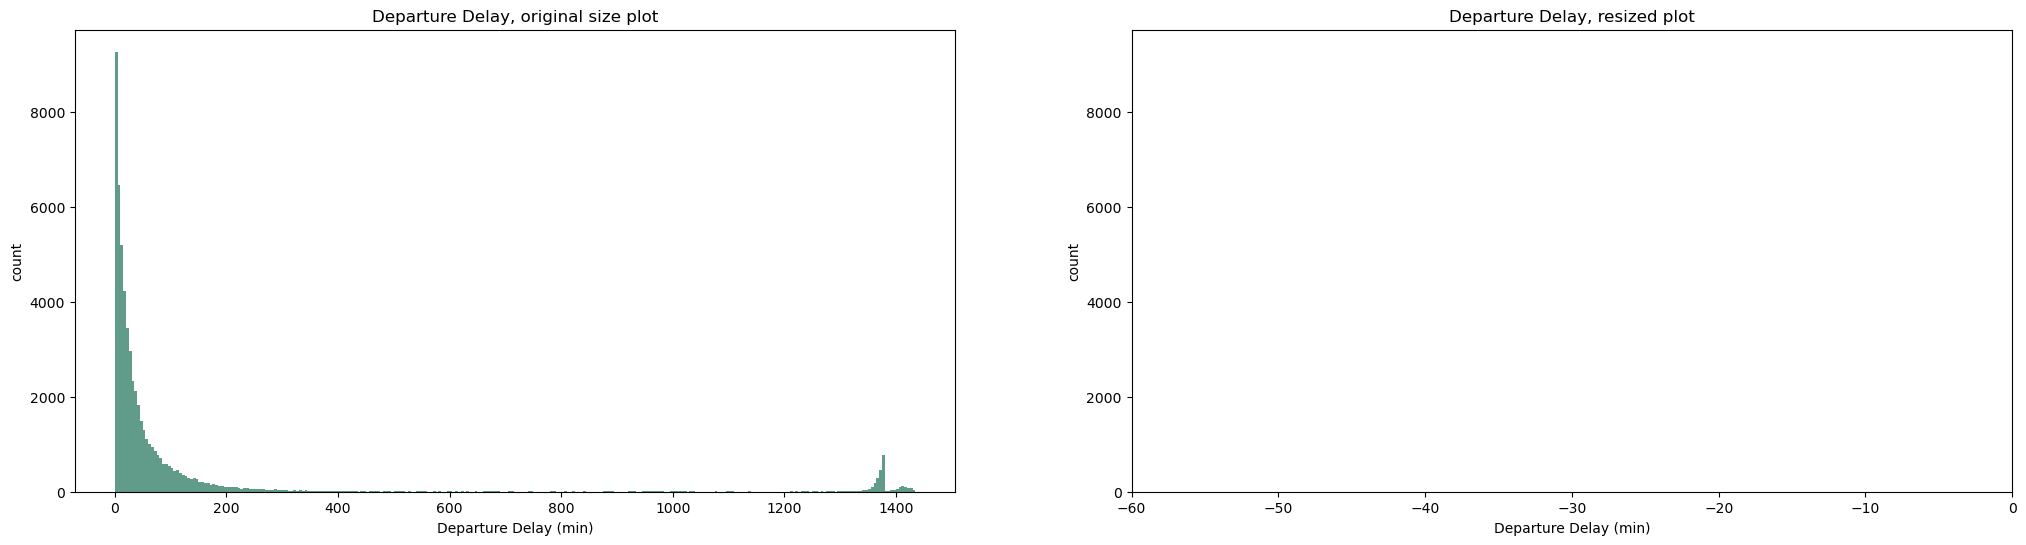

In [8]:
# Define basic color for exploration plots
color = '#619b8a'

# Plot DIFFERNCE
binsize = 5
bins = np.arange(0, df['DIFFERENCE'].max()+binsize, binsize)

plt.figure(figsize = [25, 6])

# standart plot
plt.subplot(1, 2, 1) 
plt.hist(data = df, x='DIFFERENCE', bins=bins, color=color)
plt.xlabel('Departure Delay (min)')
plt.ylabel('count')
plt.title('Departure Delay, original size plot')

# resized plot
plt.subplot(1, 2, 2)
plt.hist(data = df, x = 'DIFFERENCE', bins=bins, color=color)
plt.xlabel('Departure Delay (min)')
plt.ylabel('count')
plt.xlim((-60,0))
plt.title('Departure Delay, resized plot');
plt.show()

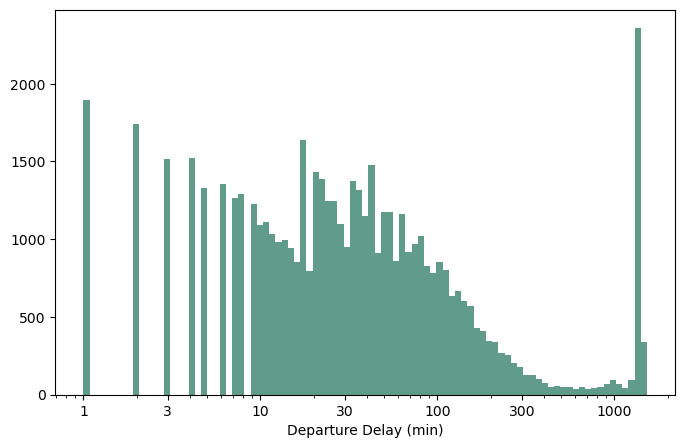

In [19]:
# Log scale distribution 

log_binsize = 0.035
bins = 10 ** np.arange(0, np.log10(df['DIFFERENCE'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'DIFFERENCE', bins = bins, color=color)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000], [1, 3, 10, 30, 100, 300, 1000])
plt.xlabel('Departure Delay (min)')
plt.show()

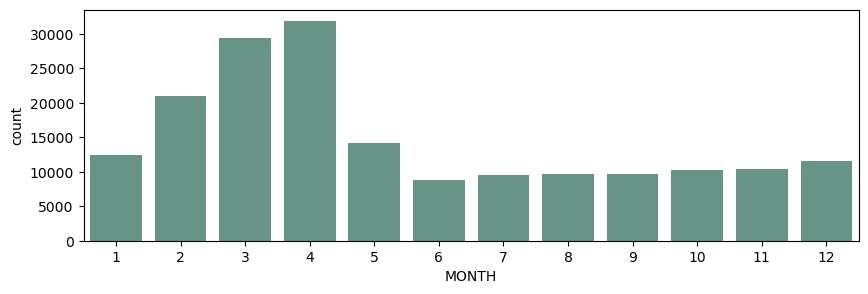

In [22]:
plt.figure(figsize = [10, 3])
sb.countplot(data=df, x='MONTH', color=color);

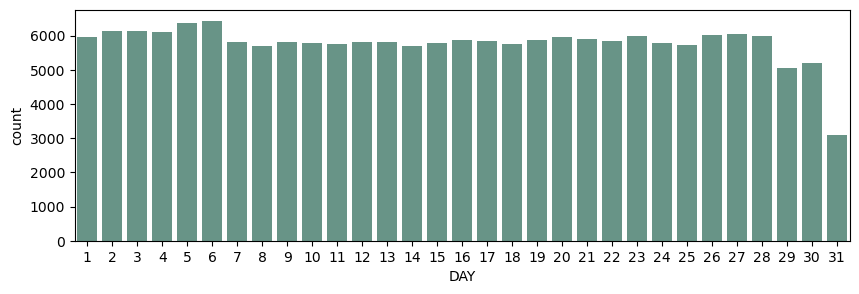

In [23]:
plt.figure(figsize = [10, 3])
sb.countplot(data=df, x='DAY', color=color);

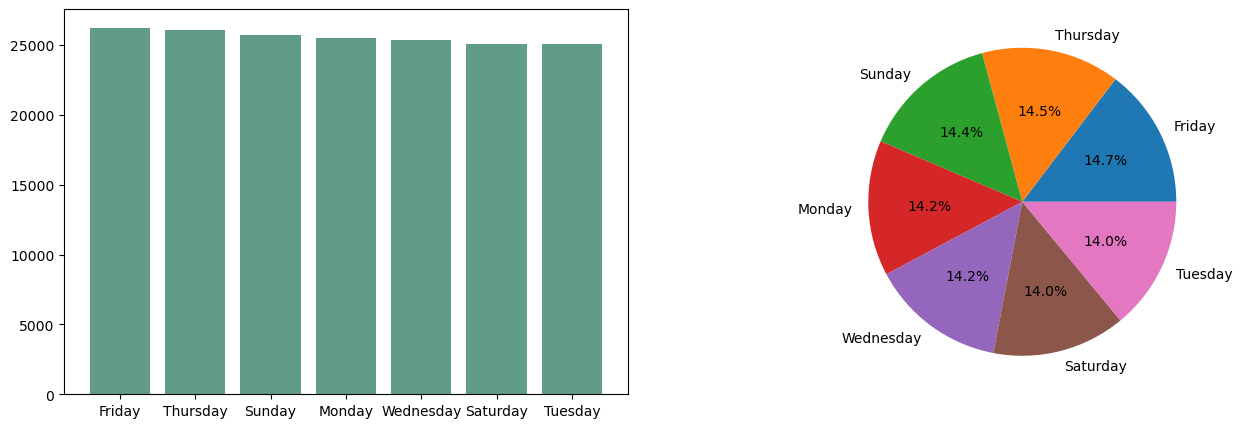

In [30]:
# order = [1, 2, 3, 4, 5, 6, 7]
values = df['DAY OF WEEK'].value_counts()
value_list = values.values.tolist()
WeekDayNames = ['Friday', 'Thursday','Sunday', 'Monday', 'Wednesday', 'Saturday', 'Tuesday']
fig, graph = plt.subplots(1,2, figsize = (16, 5))
graph[0].bar(WeekDayNames, value_list, color=color)
graph[1].pie(day_counts.values, labels=WeekDayNames, autopct='%1.1f%%')
fig.show()




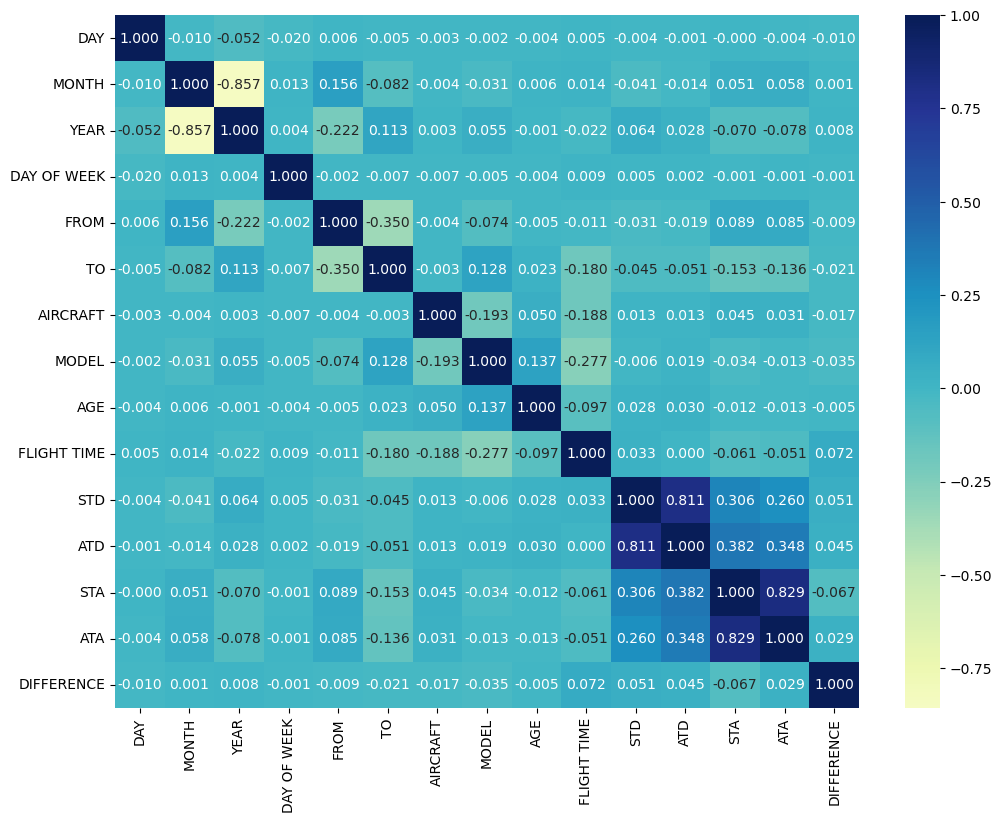

In [12]:
# Plot heatmap of numeric features

numeric_vars = ['DAY', 'MONTH', 'YEAR', 'DAY OF WEEK', 'FROM', 'TO', 'AIRCRAFT', 'MODEL', 'AGE', 'FLIGHT TIME', 'STD', 'ATD', 'STA', 'ATA', 'DIFFERENCE']

plt.figure(figsize = [12, 9])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu', center = 0)
plt.show()


In [34]:
# Prepare dataset to plot reasons of delay as categories

month_delays = df.groupby('MONTH').mean().reset_index()
tdrop = ['YEAR', 'DAY', 'DAY OF WEEK', 'DIFFERENCE']
month_delays = month_delays.drop(tdrop, axis=1)
month_delays['MONTH'] = month_delays['MONTH'].astype(str).str.zfill(2)

month_tidy = month_delays.melt(id_vars='MONTH').sort_values('MONTH')

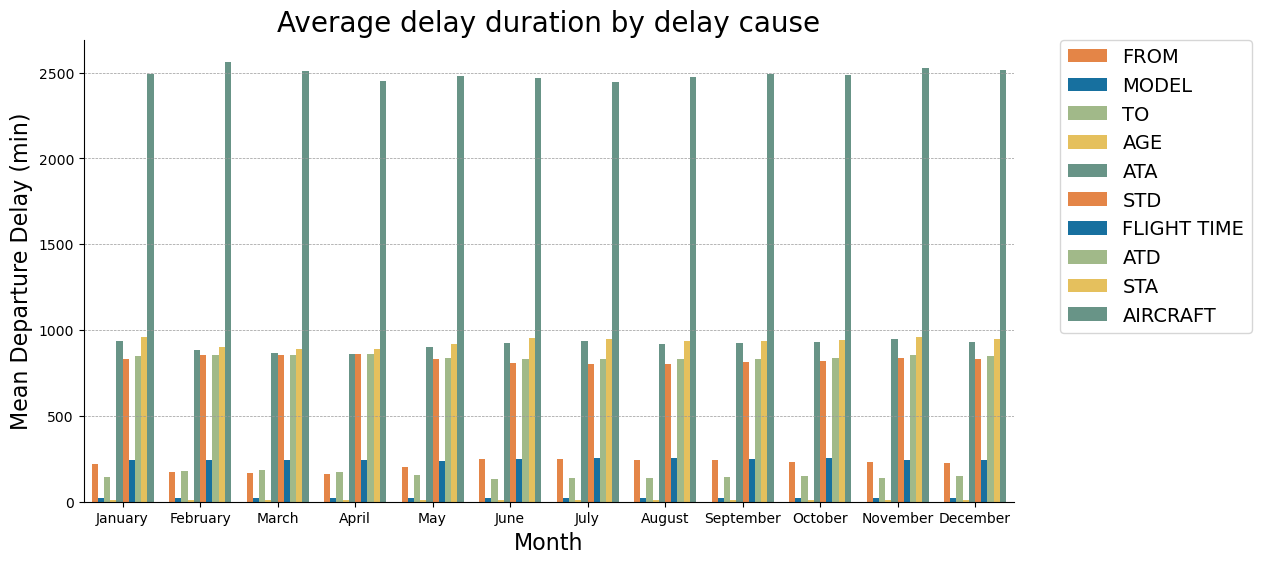

In [35]:
# Plot mean delays by the reasons and DepDelay to compare

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
del_colors = ['#fe7f2d', '#0077b6', '#a1c181', '#fcca46', '#619b8a']

plt.figure(figsize = [12, 6])
ax = sb.barplot(data = month_tidy, x = 'MONTH', y = 'value', hue = 'variable', palette=del_colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
ax.set_xticklabels(months)
ax.set_ylabel('Mean Departure Delay (min)', fontsize=16)
ax.set_title('Average delay duration by delay cause', fontsize=20)
ax.set_xlabel('Month', fontsize=16)
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
sb.despine();

Two dimensional:

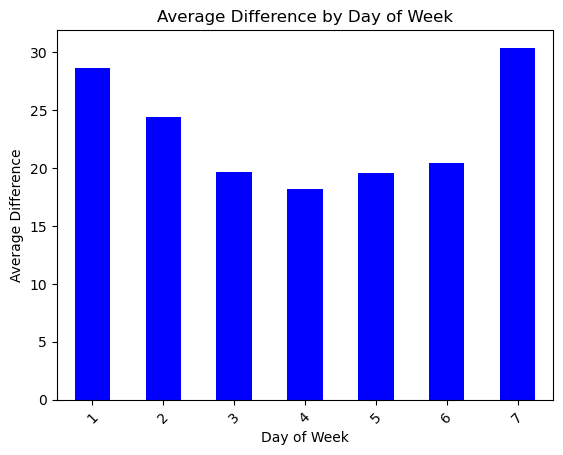

In [14]:
average_diff = df.groupby('DAY OF WEEK')['DIFFERENCE'].mean()

# Plot the average difference
average_diff.plot(kind='bar', color='blue')

# Customize the plot
plt.xlabel('Day of Week')
plt.ylabel('Average Difference')
plt.title('Average Difference by Day of Week')
plt.xticks(rotation=45)

# Display the plot
plt.show()


We can see that the days with most vurnerable days for delays are sunday and saturday

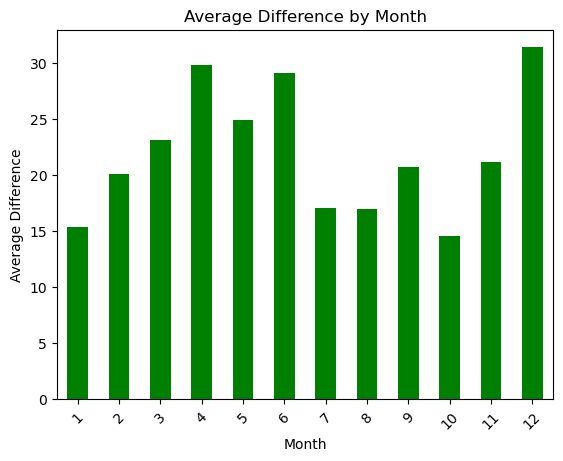

In [16]:
average_diff = df.groupby('MONTH')['DIFFERENCE'].mean()

# Plot the average difference
average_diff.plot(kind='bar', color='green')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average Difference')
plt.title('Average Difference by Month')
plt.xticks(rotation=45)

# Display the plot
plt.show()

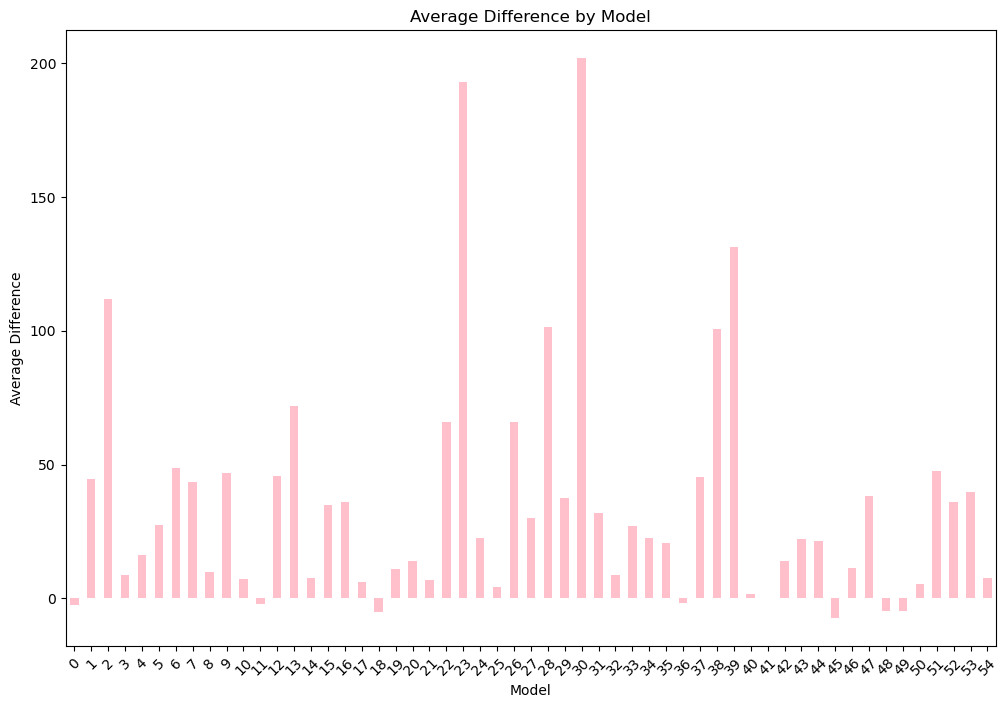

In [19]:
average_diff = df.groupby('MODEL')['DIFFERENCE'].mean()

plt.figure(figsize=(12, 8))

# Plot the average difference
average_diff.plot(kind='bar', color='pink')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Average Difference')
plt.title('Average Difference by Model')
plt.xticks(rotation=45)

# Display the plot
plt.show()

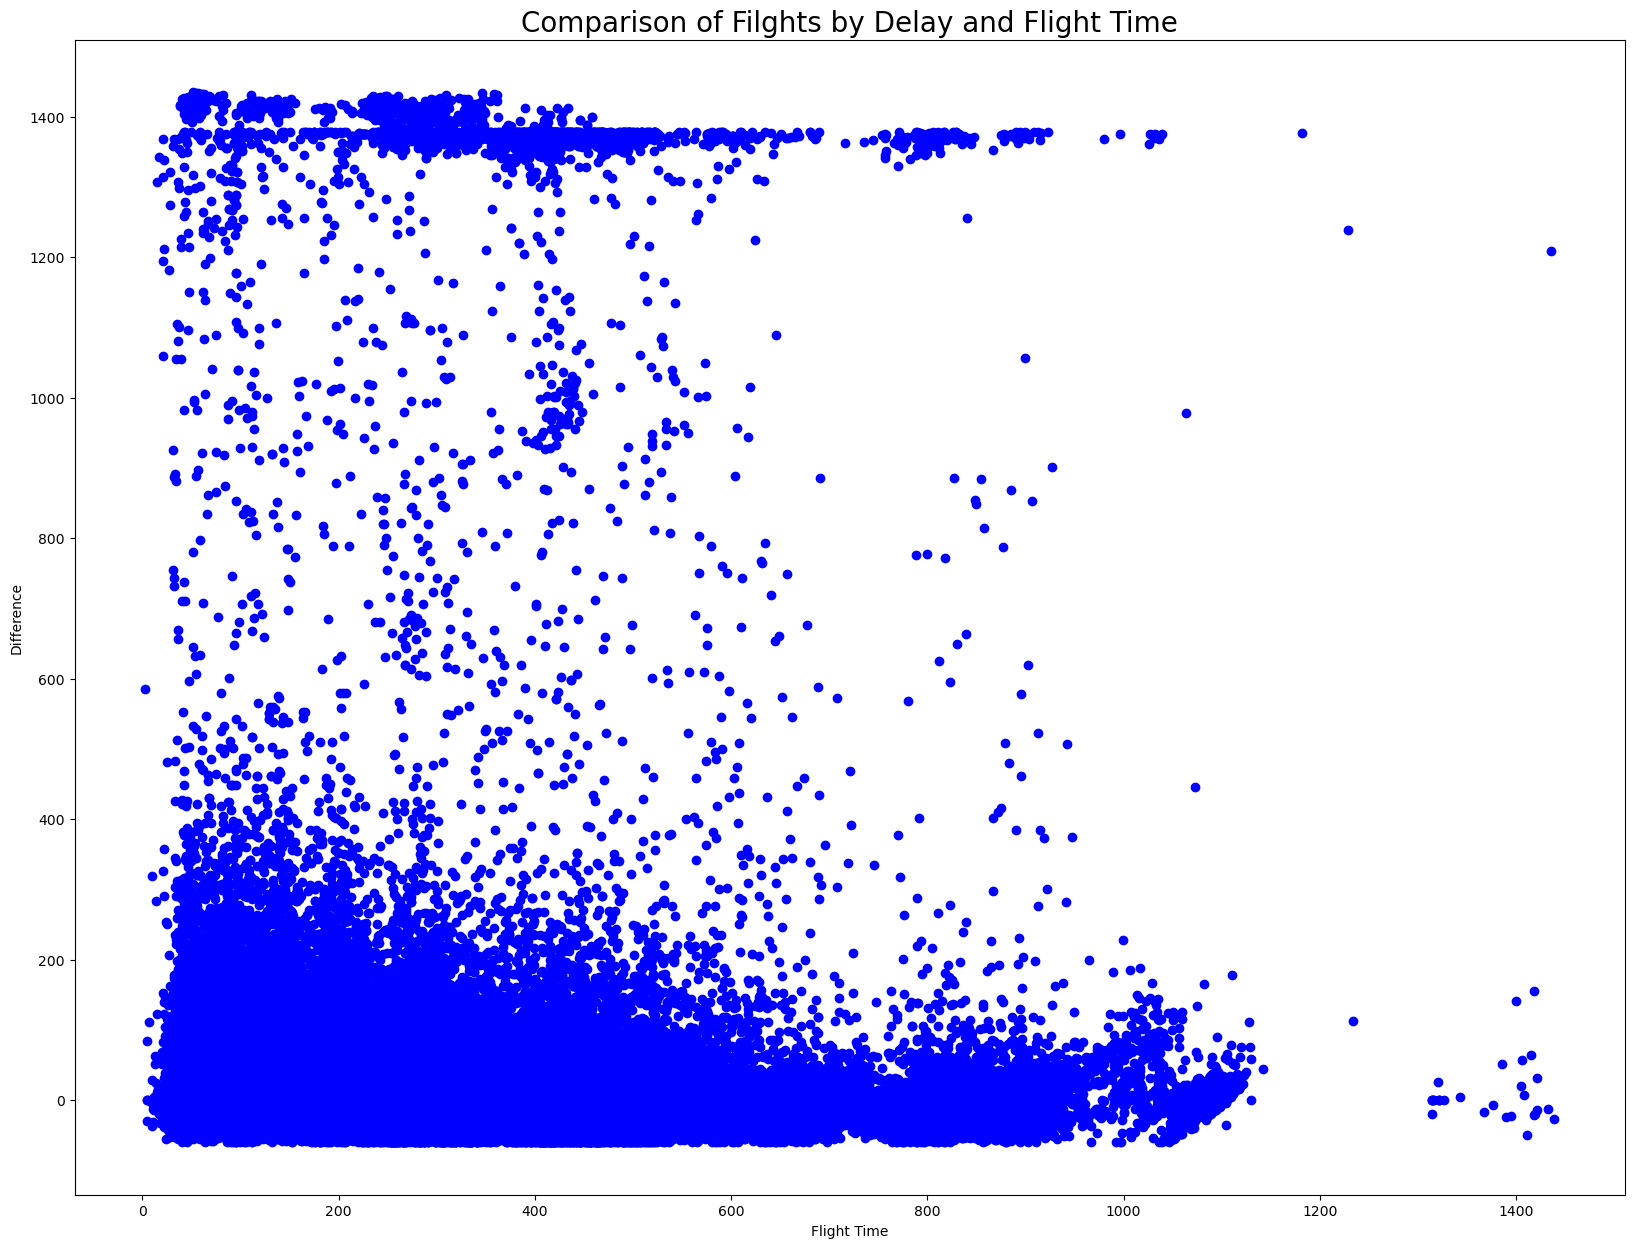

In [33]:
scat = plt.figure(figsize=(20,15))
plt.title("Comparison of Filghts by Delay and Flight Time", fontsize=20)
plt.scatter(df['FLIGHT TIME'], df['DIFFERENCE'], c='blue')
plt.xlabel("Flight Time")
plt.ylabel('Difference')
plt.show()

we can see that the longer the flight , the smaller the difference